In [1]:
library(martini)
library(blur)
library(tidyverse)
library(cowplot)

── Attaching packages ─────────────────────────────────────── tidyverse 1.2.1 ──
✔ ggplot2 2.2.1     ✔ purrr   0.2.4
✔ tibble  1.3.4     ✔ dplyr   0.7.4
✔ tidyr   0.7.2     ✔ stringr 1.2.0
✔ readr   1.1.1     ✔ forcats 0.2.0
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter()  masks stats::filter()
✖ purrr::flatten() masks jsonlite::flatten()
✖ dplyr::lag()     masks stats::lag()

Attaching package: ‘cowplot’

The following object is masked from ‘package:ggplot2’:

    ggsave



In [2]:
load("../evo/cones.gi.RData")
gi <- cones
load("../evo/cones.gm.RData")
gm <- cones
load("../evo/cones.gs.RData")
gs <- cones

additive <- join_experiments(GS = gs, GM = gm, GI = gi)
additive$any <- select(additive, starts_with("selected_")) %>% 
    rowSums(na.rm = T) %>% as.character

rm(detectedGenes, cones, info)

load("../../data/genesis/gi.net")

Warning message in rm(detectedGenes, cones, info):
“object 'detectedGenes' not found”

# Recessive

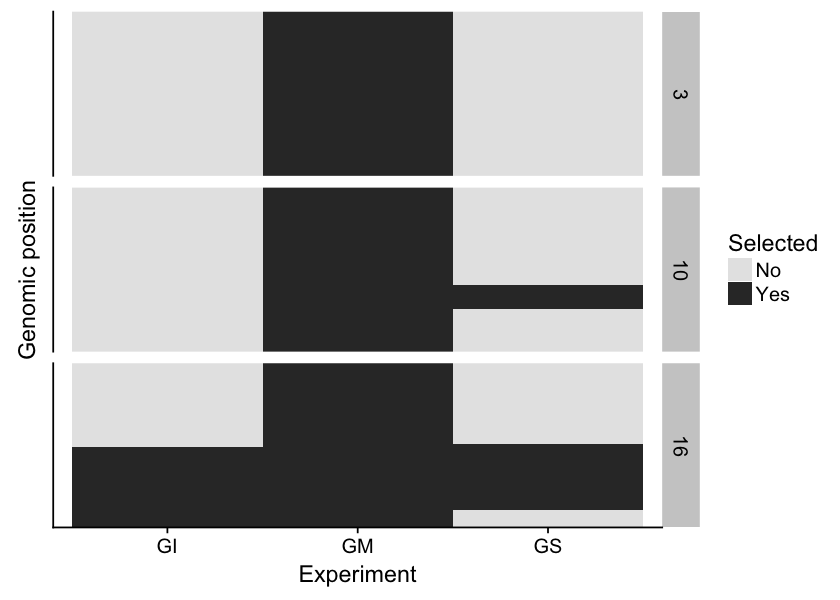

In [3]:
load("cones.evo.chi2.consistency.recessive.gi.112217.RData")
gi <- cones
load("cones.evo.chi2.consistency.recessive.gm.112217.RData")
gm <- cones
load("cones.evo.chi2.consistency.recessive.gs.112217.RData")
gs <- cones

options(repr.plot.width=7, repr.plot.height=5)
recessive <- join_experiments(GS = gs, GM = gm, GI = gi)
recessive$any <- select(recessive, starts_with("selected_")) %>% 
    rowSums(na.rm = T) %>% as.character
consistency(GS = gs, GM = gm, GI = gi)

rm(detectedGenes, cones, info)

In [4]:
nrow(recessive)

[1] 998

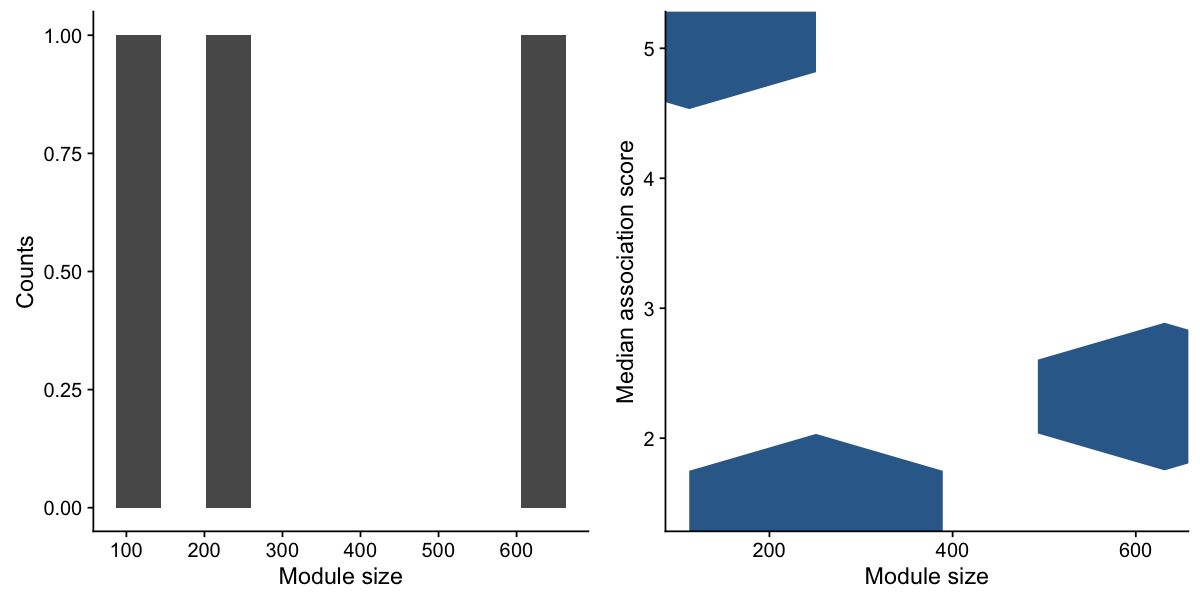

In [5]:
s <- module_size(gm)
sa <- filter(gm, !is.na(c)) %>% module_size_association() + theme(legend.position="none")

options(repr.plot.width=10, repr.plot.height=5)
plot_grid(s, sa)

Warning message in file.remove(cytoband):
“cannot remove file '/var/folders/9y/r77k2zqn7ddc01f34jm02z380000gp/T//RtmpmaVgtL/hg19_cytoBand.txt.gz', reason 'No such file or directory'”

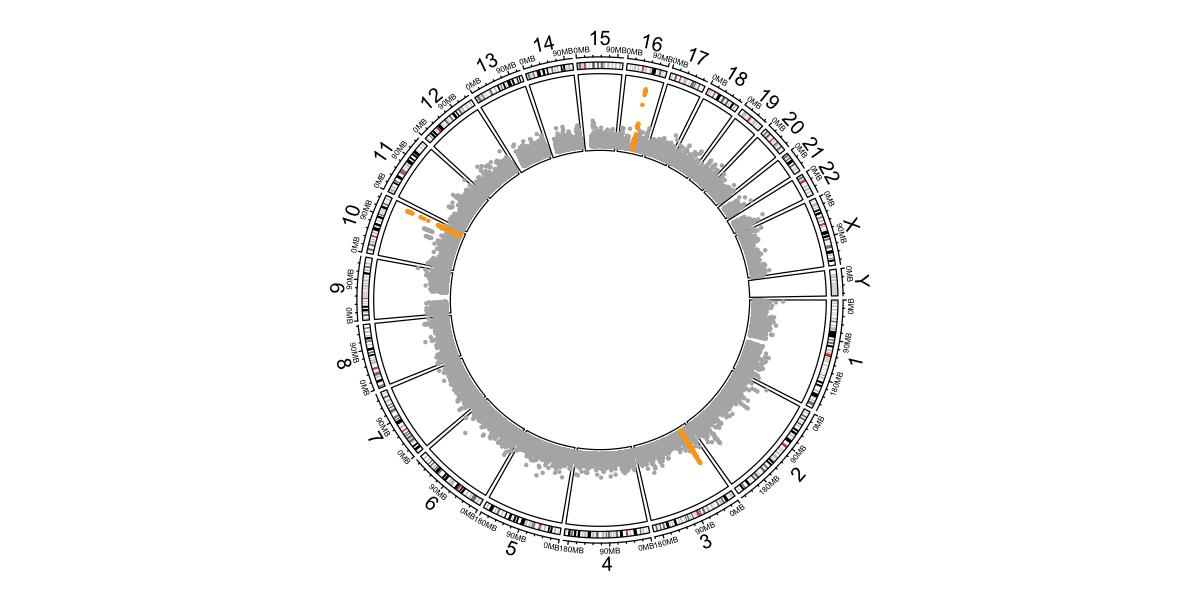

In [6]:
plot_ideogram(gm)

In [7]:
get_affected_genes(gm, net)

[1] "CASC16" "FGFR2"  "NEK10"  "SLC4A7" "TOX3"   NA

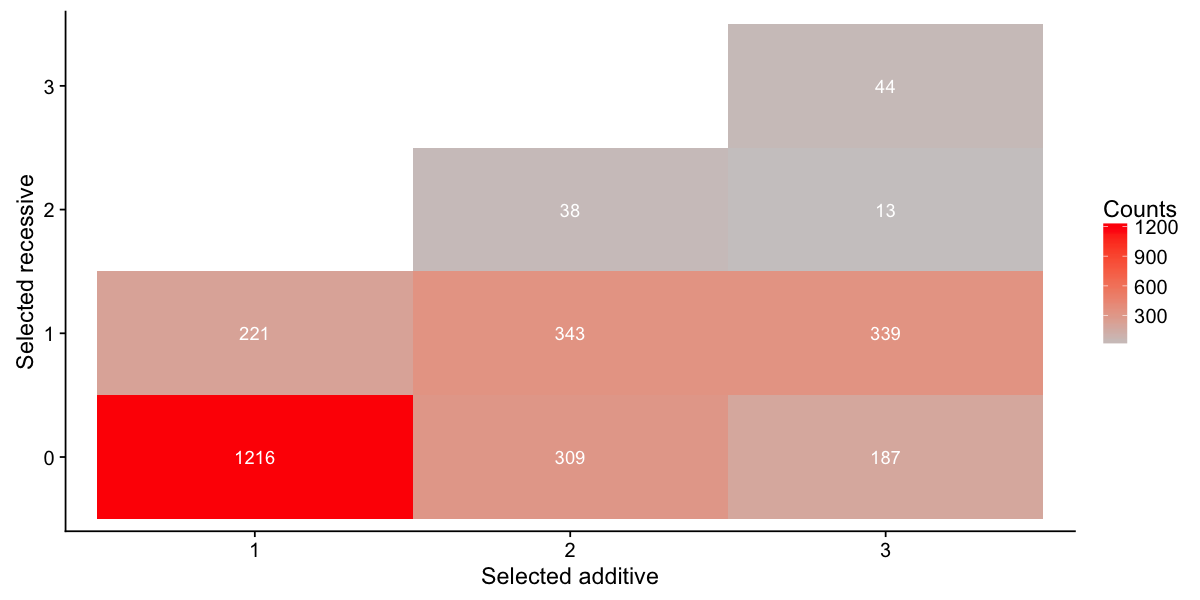

In [8]:
merge(additive, recessive, 
      by = c("chr", "snp", "cm", "pos", "allele.1", "allele.2"),
      suffixes = c(".additive", ".recessive"), all = T) %>% 
    mutate(any.additive = ifelse(is.na(any.additive), 0, any.additive),
           any.recessive = ifelse(is.na(any.recessive), 0, any.recessive)) %>%
    ggplot(aes(x = any.additive, y = any.recessive)) + 
        stat_bin2d() +
        stat_bin2d(geom = "text", aes(label = ..count..), color = "white") +
        scale_fill_gradient(low = "snow3", high = "red") +
        labs(x = "Selected additive", y = "Selected recessive", fill = "Counts")

# Dominant

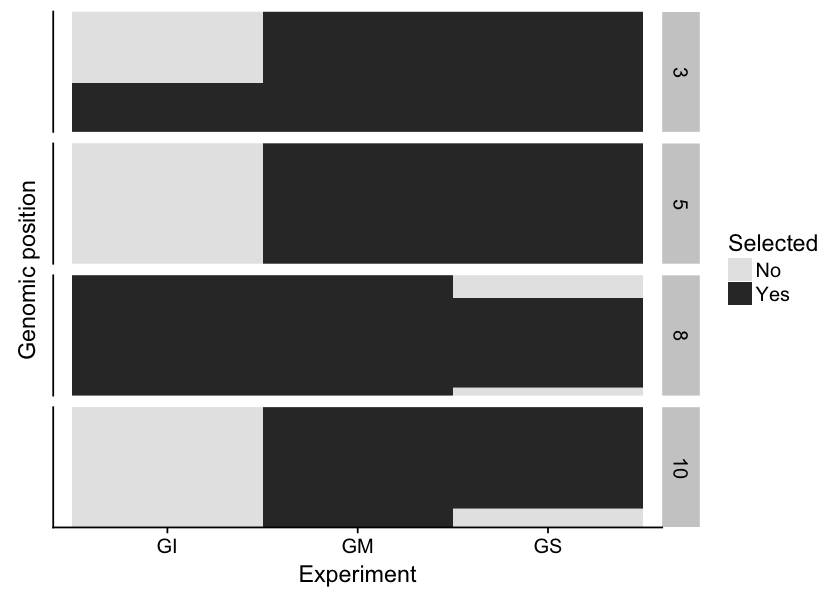

In [9]:
load("cones.evo.chi2.consistency.dominant.gi.112217.RData")
gi <- cones
load("cones.evo.chi2.consistency.dominant.gm.112217.RData")
gm <- cones
load("cones.evo.chi2.consistency.dominant.gs.112217.RData")
gs <- cones

options(repr.plot.width=7, repr.plot.height=5)
dominant <- join_experiments(GS = gs, GM = gm, GI = gi)
dominant$any <- select(dominant, starts_with("selected_")) %>% 
    rowSums(na.rm = T) %>% as.character
consistency(GS = gs, GM = gm, GI = gi)

rm(detectedGenes, cones, info)

In [10]:
nrow(dominant)

[1] 2590

Warning message in file.remove(cytoband):
“cannot remove file '/var/folders/9y/r77k2zqn7ddc01f34jm02z380000gp/T//RtmpmaVgtL/hg19_cytoBand.txt.gz', reason 'No such file or directory'”

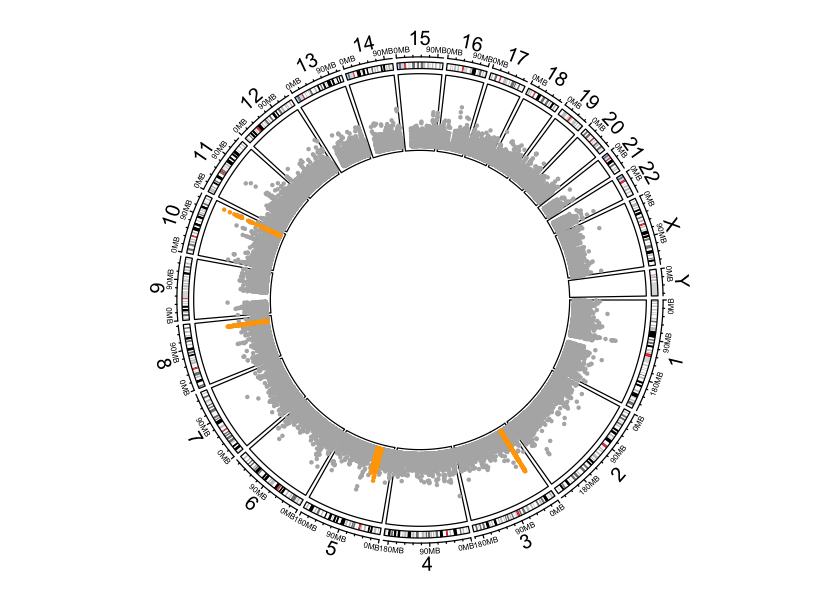

In [11]:
plot_ideogram(gm)

In [12]:
get_affected_genes(gm, net)

[1] "ANKRD55"      "ARL15"        "CASC21"       "CASC8"        "CCAT2"       
 [6] "CCNO"         "MIR449B"      "CDC20B"       "DDX4"         "FGFR2"       
[11] "GPBP1"        "GZMK"         "HCN1"         "IL31RA"       "IL6ST"       
[16] "ITGA1"        "ITGA2"        "LOC100506674" "LOC101928448" "LOC101928505"
[21] "LOC102467080" "LOC102467147" "MAP3K1"       "MIER3"        "SETD9"       
[26] "MOCS2"        "MRPS30"       "NDUFS4"       "NEK10"        "PARP8"       
[31] "SKIV2L2"      "SLC38A9"      "SLC4A7"       NA             "LOC642366"   
[36] "LOC257396"    "SNX18"        "GZMA"         "MCIDAS"

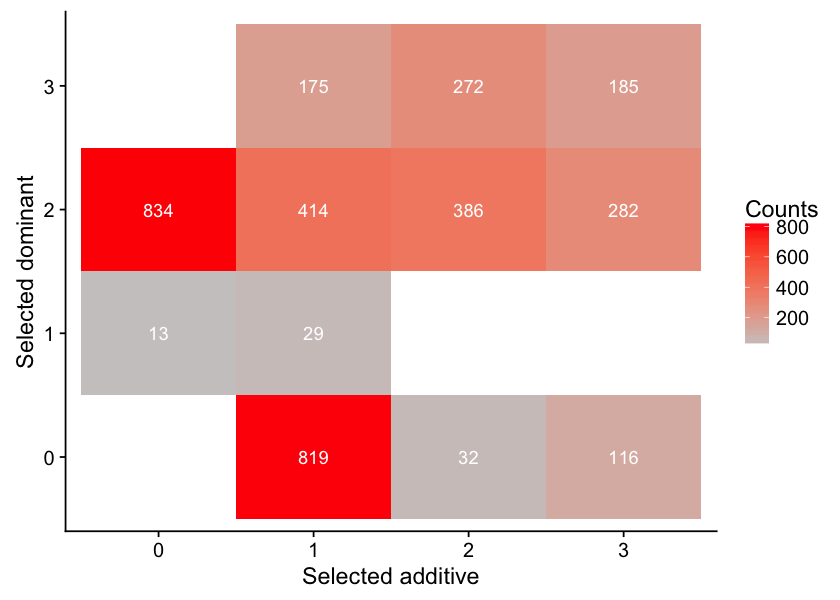

In [13]:
merge(additive, dominant, 
      by = c("chr", "snp", "cm", "pos", "allele.1", "allele.2"),
      suffixes = c(".additive", ".dominant"), all = T) %>% 
    mutate(any.additive = ifelse(is.na(any.additive), 0, any.additive),
           any.dominant = ifelse(is.na(any.dominant), 0, any.dominant)) %>%
    ggplot(aes(x = any.additive, y = any.dominant)) + 
        stat_bin2d() +
        stat_bin2d(geom = "text", aes(label = ..count..), color = "white") +
        scale_fill_gradient(low = "snow3", high = "red") +
        labs(x = "Selected additive", y = "Selected dominant", fill = "Counts")

# Co-dominant

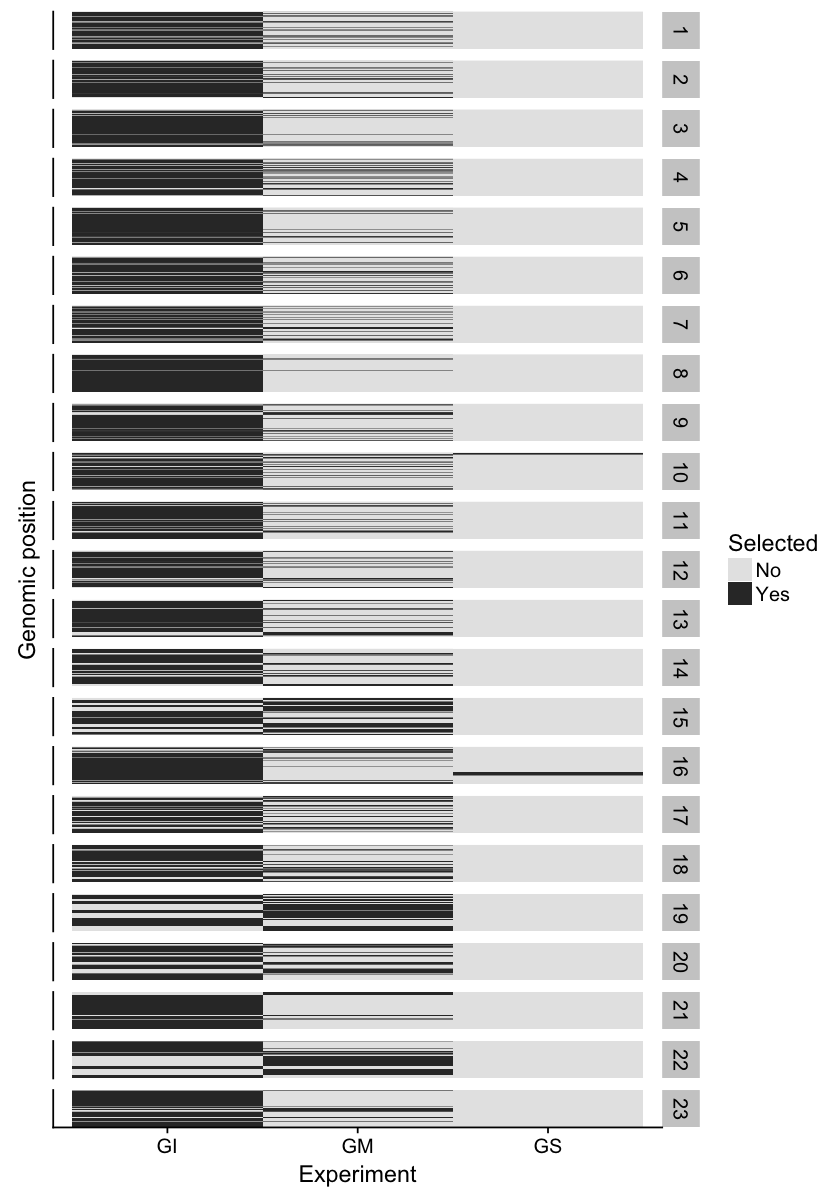

In [14]:
load("cones.evo.chi2.consistency.codominant.gi.112217.RData")
gi <- cones
load("cones.evo.chi2.consistency.codominant.gm.112217.RData")
gm <- cones
load("cones.evo.chi2.consistency.codominant.gs.112217.RData")
gs <- cones

options(repr.plot.width=7, repr.plot.height=5)
codominant <- join_experiments(GS = gs, GM = gm, GI = gi)
codominant$any <- select(codominant, starts_with("selected_")) %>% 
    rowSums(na.rm = T) %>% as.character
options(repr.plot.width=7, repr.plot.height=10)
consistency(GS = gs, GM = gm, GI = gi)

rm(detectedGenes, cones, info)

In [15]:
nrow(codominant)

[1] 8370

Warning message in file.remove(cytoband):
“cannot remove file '/var/folders/9y/r77k2zqn7ddc01f34jm02z380000gp/T//RtmpmaVgtL/hg19_cytoBand.txt.gz', reason 'No such file or directory'”

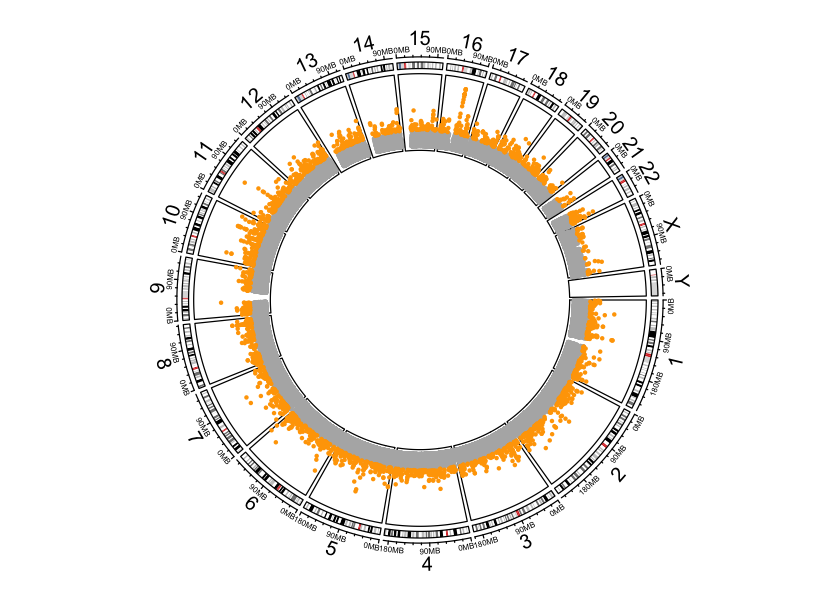

In [16]:
options(repr.plot.width=7, repr.plot.height=5)
plot_ideogram(gm)

Warning message in file.remove(cytoband):
“cannot remove file '/var/folders/9y/r77k2zqn7ddc01f34jm02z380000gp/T//RtmpmaVgtL/hg19_cytoBand.txt.gz', reason 'No such file or directory'”

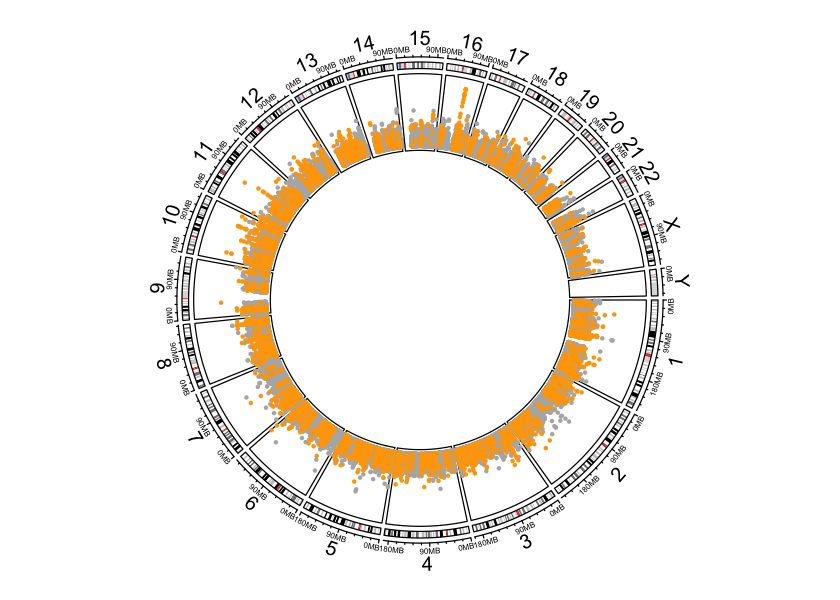

In [17]:
plot_ideogram(gi)

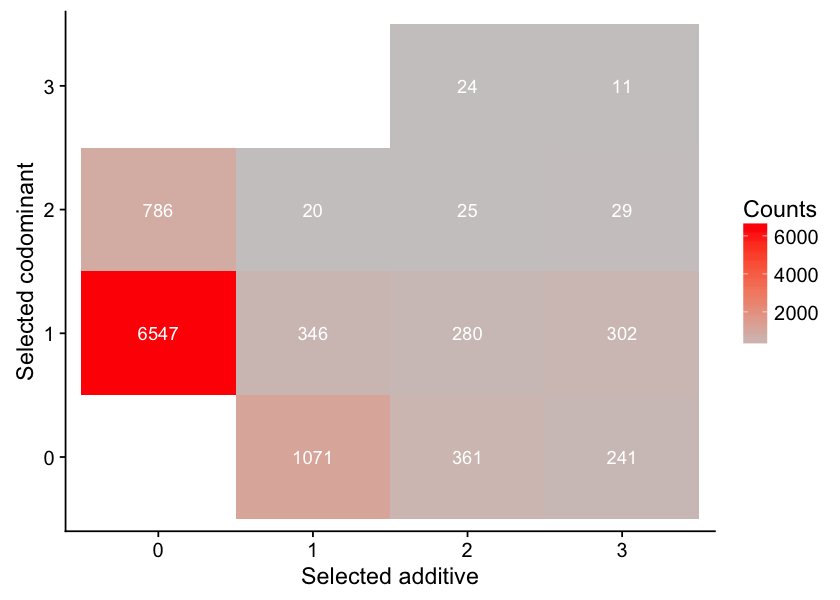

In [18]:
merge(additive, codominant, 
      by = c("chr", "snp", "cm", "pos", "allele.1", "allele.2"),
      suffixes = c(".additive", ".codominant"), all = T) %>% 
    mutate(any.additive = ifelse(is.na(any.additive), 0, any.additive),
           any.codominant = ifelse(is.na(any.codominant), 0, any.codominant)) %>%
    ggplot(aes(x = any.additive, y = any.codominant)) + 
        stat_bin2d() +
        stat_bin2d(geom = "text", aes(label = ..count..), color = "white") +
        scale_fill_gradient(low = "snow3", high = "red") +
        labs(x = "Selected additive", y = "Selected codominant", fill = "Counts")